In [1]:
import numpy as np
import math

from sklearn.decomposition import TruncatedSVD
from sklearn.utils.extmath import svd_flip, randomized_svd

from scipy.sparse.linalg import svds
from scipy.misc import imfilter
import scipy.ndimage as ndi

import scipy.io

from heapq import heappush, heappop

from random import uniform

import matplotlib
import matplotlib.pyplot as plt


from pprint import pprint

In [2]:
import os
import sys
pprint(os.getcwd())
pprint(os.path.realpath('../lib'))
sys.path.insert(0,os.path.realpath('../lib'))
pprint(sys.path)


from codar.oas.MDTrSampler import MDTrSampler, svd_wrapper
from codar.oas.util import MDTrMovieMaker



'/mnt/c/Users/shyyoo/repos/gh/MDTrAnal/src'
'/mnt/c/Users/shyyoo/repos/gh/MDTrAnal/lib'
['/mnt/c/Users/shyyoo/repos/gh/MDTrAnal/lib',
 '',
 '/home/sjyoo/anaconda3/lib/python36.zip',
 '/home/sjyoo/anaconda3/lib/python3.6',
 '/home/sjyoo/anaconda3/lib/python3.6/lib-dynload',
 '/home/sjyoo/anaconda3/lib/python3.6/site-packages',
 '/home/sjyoo/anaconda3/lib/python3.6/site-packages/torchvision-0.2.0-py3.6.egg',
 '/home/sjyoo/anaconda3/lib/python3.6/site-packages/IPython/extensions',
 '/home/sjyoo/.ipython']


In [3]:
with open('../data/collision-ah.txt') as f:
    AT = f.read().splitlines()

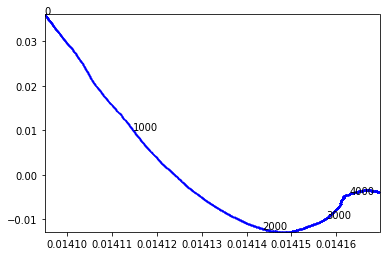

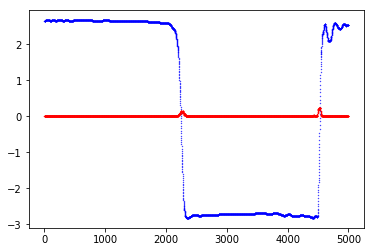

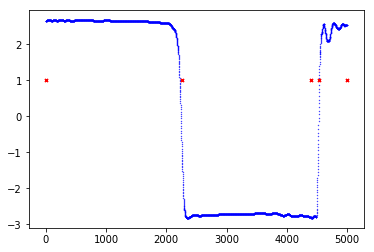

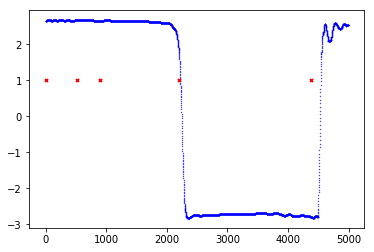

In [4]:
n_samples=5

mat= scipy.io.loadmat('../data/collision_0-5k.mat')
trace = mat['trace']
(x,y,z) = trace.shape
t2 = trace.reshape((x, y*z),order='C')

Ut, St, VTt = svd_wrapper(t2, 2, method='random')

c = Ut
s = St

n_dim=2
step=1000

fig, ax = plt.subplots()
ax.scatter(c[:,0],c[:,1], marker=".", c='b', s=0.5)
ax.set_xlim(min(c[:,0]), max(c[:,0]))
ax.set_ylim(min(c[:,1]), max(c[:,1]))
for i in range(0,x,step):
    ax.annotate(str(i),(c[i,0],c[i,1]))
plt.show()


mds =  MDTrSampler(y, n_dim = 2, conv_size = 50, n_samples=n_samples, batch_size=128, manifold_size=64)

nmpsdm, psddu, prob_dist = mds.traj_char(c,s)

fig_b, ax_b = plt.subplots()
ax_b.scatter(range(0,nmpsdm.shape[0]),nmpsdm[:,0], marker=".", c="b", s=0.5)
ax_b.scatter(range(0,psddu.shape[0]),psddu[:],marker="x", c="r", s=0.2)
plt.show()

sampling_rate = 0.005
target, time_stamps = mds.batch_sampling(trace)


fig_c, ax_c =  plt.subplots()
ax_c.scatter(range(0,nmpsdm.shape[0]),nmpsdm[:,0], marker=".", c="b", s=0.5)
ax_c.scatter(time_stamps, np.ones(time_stamps.shape),marker="x",c="r", s=10.0)
plt.show()


mds2 = MDTrSampler(y, n_dim = 2, conv_size = 50, n_samples=n_samples, batch_size=128, manifold_size=64)
for i in range(x): # not x
    mds2.adaptive_sampling_step(trace[i,:,:])


    
adaptive_samples = mds2.get_sampled_ts()
#pprint(mds2.get_sampled_ts())

#pprint(mds2.get_sampled_data())
#pprint(mds2.get_sampled_tsdata())

fig_d, ax_d = plt.subplots()
ax_d.scatter(range(0,nmpsdm.shape[0]),nmpsdm[:,0], marker=".", c="b", s=0.5)
ax_d.scatter(adaptive_samples, np.ones(len(adaptive_samples)),marker="x",c="r", s=10.0)
plt.show()


In [5]:
import logging
import time

logger = logging.getLogger('OAS')
logger.setLevel(logging.INFO)
streamHandler = logging.StreamHandler(sys.stdout)
formatter = logging.Formatter("%(asctime)s - %(filename)s - %(lineno)d - %(levelname)s - %(message)s")
formatter.converter = time.gmtime
streamHandler.setFormatter(formatter)
logger.addHandler(streamHandler)
logger.info("Logger was set")

2018-08-03 07:32:34,082 - <ipython-input-5-3748869a030a> - 11 - INFO - Logger was set


In [15]:
bdata= []
for s in time_stamps.tolist():
    bdata.append([round(s), trace[round(s)]])
#pprint(adata)
cfg = {'jmol.jar'  : '/mnt/c/Users/shyyoo/Downloads/jmol-14.29.17/Jmol.jar',
       'width'     : 520,
       'height'    : 541,
       'video_name': 'batch-out-orient-pdb-5.avi',
       'codec'     : 'XVID',#'XVID',#'X264', #'PIM1' for mpeg1
       'fps'       : 60
      }
mm = MDTrMovieMaker(bdata, x, AT, cfg, logger=logger) # with logger
#mm = MDTrMovieMaker(data, 1024, AT, cfg)
mm.create_clip_bunch()

5000
2018-08-03 08:35:45,889 - util.py - 162 - INFO - Executing : /bin/bash  preprocess.sh
2018-08-03 08:35:46,056 - util.py - 162 - INFO - Executing : java  -jar /mnt/c/Users/shyyoo/Downloads/jmol-14.29.17/Jmol.jar -g 520x541 -s angle-script.jm -ixLo out-all.pdb
2018-08-03 08:35:54,103 - util.py - 171 - INFO - b'ImageEncoder width height 520 541\nImageEncoder width height 520 541\nImageEncoder width height 520 541\nImageEncoder width height 520 541\nImageEncoder width height 520 541\n'
2018-08-03 08:35:54,125 - util.py - 133 - INFO - Processing tst/out-00001.png
2018-08-03 08:35:57,410 - util.py - 133 - INFO - Processing tst/out-00002.png
2018-08-03 08:35:59,737 - util.py - 133 - INFO - Processing tst/out-00003.png
2018-08-03 08:35:59,882 - util.py - 133 - INFO - Processing tst/out-00004.png
2018-08-03 08:36:00,503 - util.py - 133 - INFO - Processing tst/out-00005.png


In [13]:
udata= []
for i in range(0,x, int(x/(n_samples))):
    udata.append([i, trace[i]])
#pprint(adata)
cfg = {'jmol.jar'  : '/mnt/c/Users/shyyoo/Downloads/jmol-14.29.17/Jmol.jar',
       'width'     : 520,
       'height'    : 541,
       'video_name': 'unis-out-orient-pdb-5.avi',
       'codec'     : 'XVID',#'XVID',#'X264', #'PIM1' for mpeg1
       'fps'       : 60
      }
mm = MDTrMovieMaker(udata, x, AT, cfg, logger=logger) # with logger
#mm = MDTrMovieMaker(data, 1024, AT, cfg)
mm.create_clip_bunch()

5000
2018-08-03 08:34:29,879 - util.py - 162 - INFO - Executing : /bin/bash  preprocess.sh
2018-08-03 08:34:30,043 - util.py - 162 - INFO - Executing : java  -jar /mnt/c/Users/shyyoo/Downloads/jmol-14.29.17/Jmol.jar -g 520x541 -s angle-script.jm -ixLo out-all.pdb
2018-08-03 08:34:38,155 - util.py - 171 - INFO - b'ImageEncoder width height 520 541\nImageEncoder width height 520 541\nImageEncoder width height 520 541\nImageEncoder width height 520 541\nImageEncoder width height 520 541\n'
2018-08-03 08:34:38,172 - util.py - 133 - INFO - Processing tst/out-00001.png
2018-08-03 08:34:39,318 - util.py - 133 - INFO - Processing tst/out-00002.png
2018-08-03 08:34:40,330 - util.py - 133 - INFO - Processing tst/out-00003.png
2018-08-03 08:34:41,375 - util.py - 133 - INFO - Processing tst/out-00004.png
2018-08-03 08:34:42,379 - util.py - 133 - INFO - Processing tst/out-00005.png


In [21]:
adata= []
for s in adaptive_samples:
    adata.append([round(s), trace[round(s)]])
#pprint(adata)
cfg = {'jmol.jar'  : '/mnt/c/Users/shyyoo/Downloads/jmol-14.29.17/Jmol.jar',
       'width'     : 520,
       'height'    : 541,
       'video_name': 'test-out-orient-pdb-5.avi',
       'codec'     : 'XVID',#'XVID',#'X264', #'PIM1' for mpeg1
       'fps'       : 60
      }
mm = MDTrMovieMaker(adata, x, AT, cfg, logger=logger) # with logger
#mm = MDTrMovieMaker(data, 1024, AT, cfg)
mm.create_clip_bunch(view_angle=mds2.get_optimal_view_angle())

5000
2018-08-03 18:22:27,890 - util.py - 162 - INFO - Executing : /bin/bash  preprocess.sh
2018-08-03 18:22:28,041 - util.py - 162 - INFO - Executing : java  -jar /mnt/c/Users/shyyoo/Downloads/jmol-14.29.17/Jmol.jar -g 520x541 -s angle-script.jm -ixLo out-all.pdb
2018-08-03 18:22:36,747 - util.py - 171 - INFO - b'ImageEncoder width height 520 541\nImageEncoder width height 520 541\nImageEncoder width height 520 541\nImageEncoder width height 520 541\nImageEncoder width height 520 541\n'
2018-08-03 18:22:36,757 - util.py - 133 - INFO - Processing tst/out-00001.png
2018-08-03 18:22:37,513 - util.py - 133 - INFO - Processing tst/out-00002.png
2018-08-03 18:22:37,905 - util.py - 133 - INFO - Processing tst/out-00003.png
2018-08-03 18:22:39,185 - util.py - 133 - INFO - Processing tst/out-00004.png
2018-08-03 18:22:41,297 - util.py - 133 - INFO - Processing tst/out-00005.png
